# Guided Capstone Step 3 Exploratory Data Analysis

With Data Wrangling out of the way, it's time to move into the Exploratory Data Analysis phase of this guided capstone. In this exercise, you'll learn to build data profiles and plots, including a relationship plot and a data correlation plot. You'll also implement k-means clustering, complete clusters, and update a dataframe as a CSV file. Let's get started! 
  
**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  * Data Collection 
   * Data Organization
  * Data Definition 
  * Data Cleaning
 
3.   **Exploratory Data Analysis** 
 * Build data profile tables and plots
        - Outliers & Anomalies
 * Explore data relationships
 * Identification and creation of features

4.   Pre-processing and Training Data Development
  * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as you did in step 2 of the guided capstone. Print out your current working directory to confirm you are in the correct project directory. </font>**

In [1]:
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

os.getcwd()

'/Users/suzutomato/springboard/GuidedCapstone'

**<font color='teal'> If you need to change your path, refer back to step 2 to review how to do this. Load the csv file you created in step 2. Remember, it should be saved inside your data subfolder. Print the first five rows.</font>**

In [2]:
df = pd.read_csv('./data/step2_output.csv')
df.head()

Name   Region    state  summit_elev  vertical_drop  \
0       Alyeska Resort   Alaska   Alaska         3939           2500   
1  Eaglecrest Ski Area   Alaska   Alaska         2600           1540   
2     Hilltop Ski Area   Alaska   Alaska         2090            294   
3     Arizona Snowbowl  Arizona  Arizona        11500           2300   
4  Sunrise Park Resort  Arizona  Arizona        11100           1800   

   base_elev  trams  fastEight  fastSixes  fastQuads  ...  LongestRun_mi  \
0        250      1        0.0          0          2  ...            1.0   
1       1200      0        0.0          0          0  ...            2.0   
2       1796      0        0.0          0          0  ...            1.0   
3       9200      0        0.0          1          0  ...            2.0   
4       9200      0        0.0          0          1  ...            1.2   

   SkiableTerrain_ac  Snow Making_ac  daysOpenLastYear  yearsOpen  \
0             1610.0           113.0             150.0       60.0   
1              640.0            60.0              45.0       44.0   
2               30.0            30.0             150.0       36.0   
3              777.0           104.0             122.0       81.0   
4              800.0            80.0             115.0       49.0   

   averageSnowfall  AdultWeekday  AdultWeekend  projectedDaysOpen  \
0            669.0          65.0          85.0              150.0   
1            350.0          47.0          53.0               90.0   
2             69.0          30.0          34.0              152.0   
3            260.0          89.0          89.0              122.0   
4            250.0          74.0          78.0              104.0   

   NightSkiing_ac  
0           550.0  
1             0.0  
2            30.0  
3             0.0  
4            80.0  

[5 rows x 27 columns]

# Build data profile tables and plots 

**<font color='teal'> Print out the summary stats table transposed to fit on the screen using the `describe()` function.</font>**

In [3]:
df.describe().T

count         mean          std    min      25%  \
summit_elev        330.0  4591.818182  3735.535934  315.0  1403.75   
vertical_drop      330.0  1215.427273   947.864557   60.0   461.25   
base_elev          330.0  3374.000000  3117.121621   70.0   869.00   
trams              330.0     0.172727     0.559946    0.0     0.00   
fastEight          330.0     0.003030     0.055048    0.0     0.00   
fastSixes          330.0     0.184848     0.651685    0.0     0.00   
fastQuads          330.0     1.018182     2.198294    0.0     0.00   
quad               330.0     0.933333     1.312245    0.0     0.00   
triple             330.0     1.500000     1.619130    0.0     0.00   
double             330.0     1.833333     1.815028    0.0     1.00   
surface            330.0     2.621212     2.059636    0.0     1.00   
total_chairs       330.0     8.266667     5.798683    0.0     5.00   
Runs               330.0    48.214724    46.081366    3.0    19.00   
TerrainParks       330.0     2.820789     1.845918    1.0     2.00   
LongestRun_mi      330.0     1.433231     1.147352    0.0     0.60   
SkiableTerrain_ac  330.0   739.801223  1807.868079    8.0    85.00   
Snow Making_ac     330.0   174.873239   242.378848    2.0    55.00   
daysOpenLastYear   330.0   114.391725    32.956501    3.0   100.00   
yearsOpen          330.0    63.656535   109.263494    6.0    50.00   
averageSnowfall    330.0   183.203145   134.566629   18.0    70.00   
AdultWeekday       330.0    57.916957    23.898798   15.0    43.00   
AdultWeekend       330.0    64.166810    22.571324   17.0    49.00   
projectedDaysOpen  330.0   119.528886    29.209127   30.0   100.00   
NightSkiing_ac     330.0    56.890909    93.464882    0.0     0.00   

                           50%          75%      max  
summit_elev        3127.500000  7806.000000  13487.0  
vertical_drop       964.500000  1800.000000   4425.0  
base_elev          1561.500000  6325.250000  10800.0  
trams                 0.000000     0.000000      4.0  
fastEight             0.000000     0.000000      1.0  
fastSixes             0.000000     0.000000      6.0  
fastQuads             0.000000     1.000000     15.0  
quad                  0.000000     1.000000      8.0  
triple                1.000000     2.000000      8.0  
double                1.000000     3.000000     14.0  
surface               2.000000     3.000000     15.0  
total_chairs          7.000000    10.000000     41.0  
Runs                 34.000000    60.000000    341.0  
TerrainParks          2.820789     3.000000     14.0  
LongestRun_mi         1.000000     2.000000      6.0  
SkiableTerrain_ac   200.000000   739.801223  26819.0  
Snow Making_ac      132.500000   192.000000   3379.0  
daysOpenLastYear    110.500000   133.000000    305.0  
yearsOpen            58.000000    68.750000   2019.0  
averageSnowfall     144.000000   289.535714    669.0  
AdultWeekday         57.916957    67.000000    179.0  
AdultWeekend         64.166810    72.000000    179.0  
projectedDaysOpen   118.777778   137.000000    305.0  
NightSkiing_ac       27.000000    83.750000    650.0

**<font color='teal'> Histograms are an excellent way to review the range and density of values for each numeric feature in your dataset and to build data profiles. Plot the histograms for all numeric features and adjust the bins size to 25.</font>**

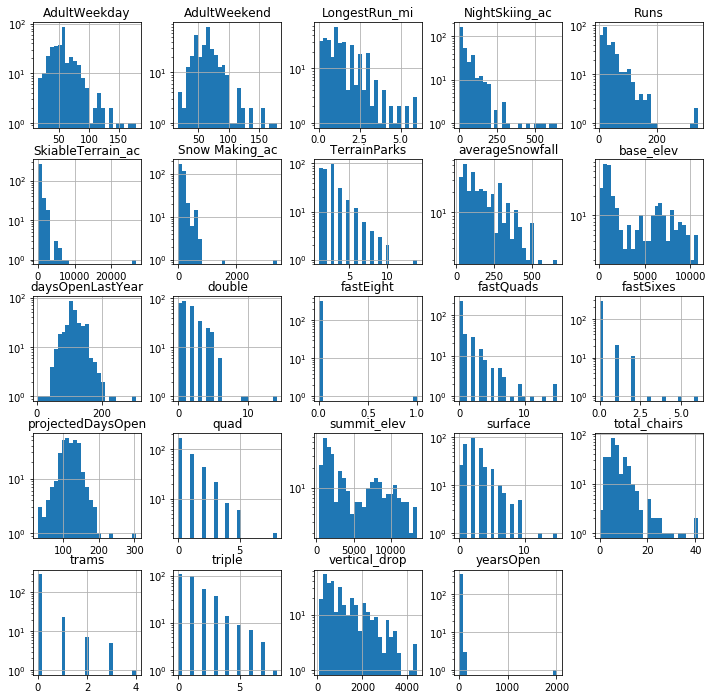

In [4]:
# plotting histgram with logarithmic y-axis for visibility
df.hist(bins=25, figsize=(12, 12), log=True)
plt.show()

Look for similarities in the features that may indicate that they are duplicates or highly correlated features. Make a note of your findings and any other interesting insights you find about these numeric features.

**<font color='teal'> Okay, now you should be getting a sense for what the data looks like. Let's create a barplot for the categorical features `Region` and `State` where the heights of the bars are the counts of each level in that variable. </font>**

**<font color='teal'>State and Region Levels Plot</font>**

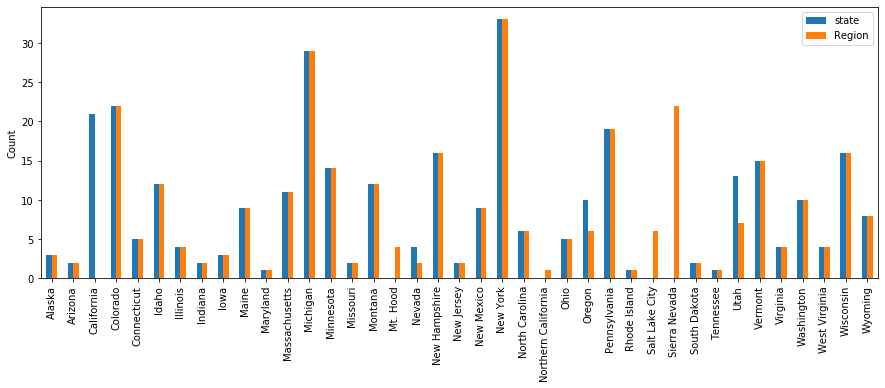

In [5]:
comp_df = pd.DataFrame({'state': df.state.value_counts(),
                        'Region': df.Region.value_counts()})
comp_df.plot.bar(figsize=(15,5))
plt.ylabel('Count')
plt.show()

By reviewing the State and Region count plots, you should notice that the Region feature is nearly identical to the State feature and therfore you can remove the Region column from the dataframe.**<font color='teal'> Remove the `Region` column using the drop function.</font>**

In [6]:
df.drop('Region', axis=1, inplace=True)

## Anamolies & outliers - review boxplots

**<font color='teal'> Print a boxplot for every column</font>**

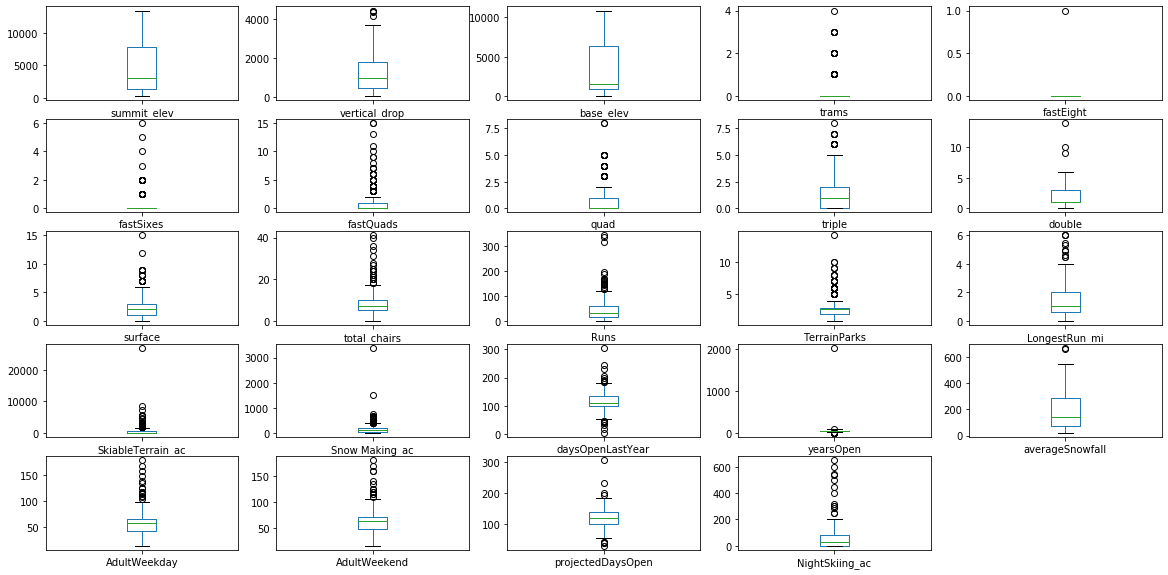

In [7]:
df.plot.box(figsize=(20,10), subplots=True, layout=(5,5))
plt.show()

You need to create boxplots and  histograms to evaluate the data for potential outliers or data anomalies. Generally, outliers are defined as observations that differ significantly from the other values in the dataset or feature. 

Reviewing the distribution of values by column will help you  interpret this. Outliers are extreme values that fall far outside the mean and standard deviation of a set of observations. They  can mislead the training process in building machine learning models. Outliers may be real anomalies in the observations, or artificial errors. 

One method for outlier analysis is extreme value analysis using a boxplot, which assumes a normal distribution. The figure below describes the components of a boxplot. Notice the outlier is the point outside the upper whisker end. 

![](AnnotatedBoxplot.png)
<font color='teal'> <b> Follow these steps:  

1. Create boxplots - earlier step
2. Apply outlier removal using the Interquartile range or replacement 
3. Review how many observations were removed </b> </font>

In [8]:
# Set elimination conditions.
# Whisker is up to a length of 1.5 times the IQR 
# below and above of the 1st and 3rd quartile respectively.
quantile_25, quantile_75 = df.quantile(0.25), df.quantile(0.75)
iqr = quantile_75 - quantile_25
whis_min = quantile_25 - (1.5 * iqr)
whis_max = quantile_75 + (1.5 * iqr)
not_outlier = (df >= whis_min) & (df <= whis_max)
not_outlier[['Name', 'state']] = True

In [9]:
# Set individual condition to detect outliers based on
# histogram and box plots.

def is_outlier(s):
    return ((s.vertical_drop > 4000) 
            or (s.Runs > 120)
            or (s.TerrainParks > 10)
            or (s.LongestRun_mi > 4)
            or (s.SkiableTerrain_ac > 4000)
            or (s.NightSkiing_ac > 600)
            or (s['Snow Making_ac'] > 600)
            or (s.daysOpenLastYear < 50) 
            or (s.daysOpenLastYear > 210)
            or (s.yearsOpen > 500)
            or (s.averageSnowfall > 600)
            or (s.AdultWeekday > 140)
            or (s.projectedDaysOpen > 160))

df2 = df.copy()
df2['outlier_indv'] = df2.apply(is_outlier, axis=1)
df2['outlier_whis'] = not_outlier.sum(axis=1) != len(not_outlier.columns)
df2['outlier'] = (df2[['outlier_indv', 'outlier_whis']].sum(axis=1) == 2)
df2.drop(['outlier_indv', 'outlier_whis'], axis=1, inplace=True)

In [10]:
# Exclude the numbers of fast lifts from elimination,
# as most of the resorts don't have one, yet it doesn't 
# mean having one makes it an outlier. It's rather an 
# advantage of a resort and should be taken into account.
# Can be converted into categorical data (have one or not.)
# to_exclude = set(['fastEight', 'fastSixes', 'fastQuads', 'trams'])
# to_exclude |= set(['Name', 'state']) # exclude categoricals as well.

# to_update = [col for col in df.columns if col not in to_exclude]

In [11]:
# Remove outliers
# Note it drops all observations with one or more NaN value(s)
# df[to_update] = df[to_update][not_outlier]
# df.dropna(inplace=True, how='any') # 'any' for visibility
to_drop = df2[df2.outlier].index
df2.drop(to_drop, inplace=True)
df2.drop('outlier', axis=1, inplace=True)

In [12]:
# Calculate the number of deleted observations.
orig_len = len(df)
print('{} observations are removed.'.format(orig_len - len(df2.index)))

51 observations are removed.


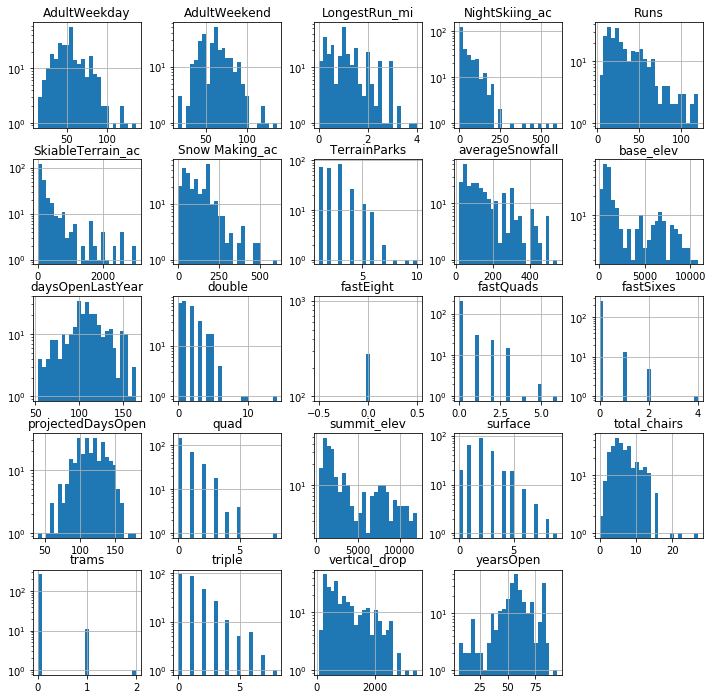

In [13]:
df2.hist(bins=25, figsize=(12,12), log=True)
plt.show()

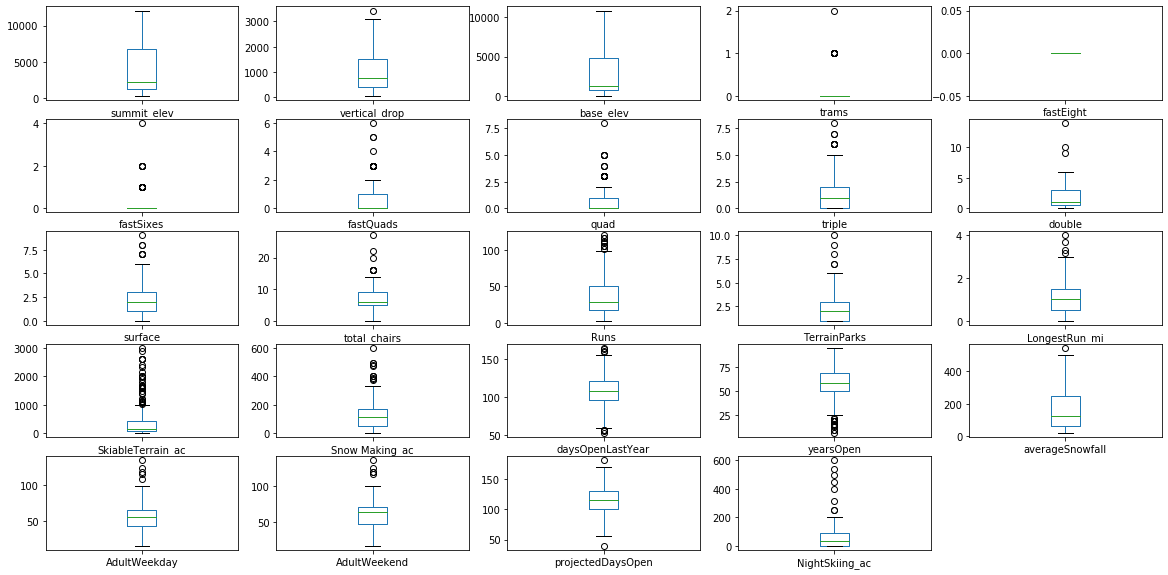

In [14]:
df2.plot.box(figsize=(20,10), subplots=True, layout=(5,5))
plt.show()

There are many possible response variables you could have identified during Step 1 of the guided capstone. However, for the rest of this guided capstone project, you will focus on increasing revenue by increasing the lift ticket prices and the number of days the resort is open per year. In this case, you need to investigate the expected lift ticket price for Big Mountain based on all the other given resort characteristics. In addition, you'll want to predict the number of days the mountain is open each season.

<font color='teal'>**Review the `AdultWeekday`,`AdultWeekend` response variable distributions**</font>

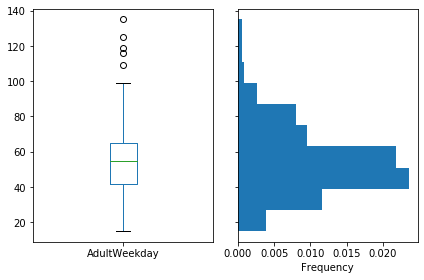

In [15]:
def print_dist_plots(col_name: str):
    '''Prints box plot and histgram for a column side by side.'''
    fig, (ax_box, ax_hist) = plt.subplots(nrows=1, ncols=2, sharey=True)
    df2[col_name].plot.box(ax=ax_box)
    df2[col_name].plot.hist(ax=ax_hist, density=True, orientation="horizontal")
    fig.tight_layout()
    plt.show()

print_dist_plots('AdultWeekday')

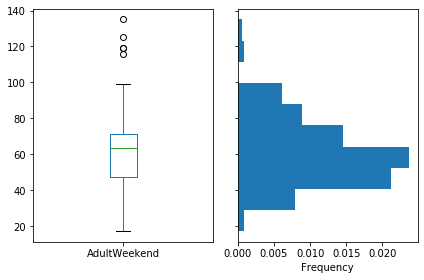

In [16]:
print_dist_plots('AdultWeekend')

<font color='teal'>**Review the `daysOpenLastYear`,`projecteDaysOpen` response variable distributions**</font>

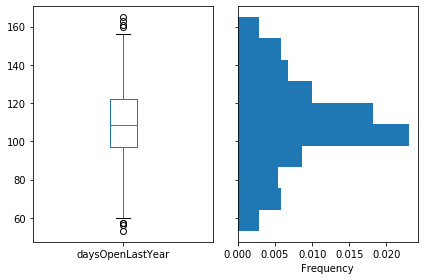

In [17]:
print_dist_plots('daysOpenLastYear')

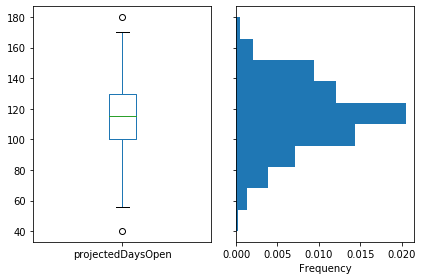

In [18]:
print_dist_plots('projectedDaysOpen')

After reviewing these response varible distributions, there doesn't appear to be any data issues to mitigate. Now, you'll move on to investigating feature relationships and interactions between the features and the response.

In [19]:
df2.describe().T

count         mean          std    min     25%  \
summit_elev        279.0  3913.275986  3298.684977  315.0  1285.0   
vertical_drop      279.0   988.573477   706.141961   60.0   425.0   
base_elev          279.0  2914.813620  2873.624168   70.0   806.5   
trams              279.0     0.046595     0.227548    0.0     0.0   
fastEight          279.0     0.000000     0.000000    0.0     0.0   
fastSixes          279.0     0.096774     0.408485    0.0     0.0   
fastQuads          279.0     0.508961     1.017345    0.0     0.0   
quad               279.0     0.845878     1.184997    0.0     0.0   
triple             279.0     1.390681     1.536622    0.0     0.0   
double             279.0     1.792115     1.817127    0.0     0.5   
surface            279.0     2.394265     1.638817    0.0     1.0   
total_chairs       279.0     7.075269     3.611243    0.0     5.0   
Runs               279.0    37.278295    25.284831    3.0    18.0   
TerrainParks       279.0     2.580414     1.482908    1.0     1.0   
LongestRun_mi      279.0     1.167979     0.825353    0.0     0.5   
SkiableTerrain_ac  279.0   413.363454   592.247103    8.0    71.0   
Snow Making_ac     279.0   130.770357    98.819193    2.0    50.0   
daysOpenLastYear   279.0   109.378494    23.423062   53.0    97.0   
yearsOpen          279.0    57.532819    16.885895    6.0    50.5   
averageSnowfall    279.0   161.883511   121.915052   18.0    60.0   
AdultWeekday       279.0    54.825593    19.475666   15.0    42.0   
AdultWeekend       279.0    61.494748    18.239075   17.0    47.0   
projectedDaysOpen  279.0   115.105302    22.335112   40.0   100.0   
NightSkiing_ac     279.0    58.559140    84.210612    0.0     0.0   

                           50%          75%      max  
summit_elev        2250.000000  6818.500000  12075.0  
vertical_drop       750.000000  1500.000000   3430.0  
base_elev          1300.000000  4875.000000  10790.0  
trams                 0.000000     0.000000      2.0  
fastEight             0.000000     0.000000      0.0  
fastSixes             0.000000     0.000000      4.0  
fastQuads             0.000000     1.000000      6.0  
quad                  0.000000     1.000000      8.0  
triple                1.000000     2.000000      8.0  
double                1.000000     3.000000     14.0  
surface               2.000000     3.000000      9.0  
total_chairs          6.000000     9.000000     27.0  
Runs                 28.000000    51.000000    120.0  
TerrainParks          2.000000     3.000000     10.0  
LongestRun_mi         1.000000     1.500000      4.0  
SkiableTerrain_ac   169.000000   450.000000   3000.0  
Snow Making_ac      112.000000   174.873239    600.0  
daysOpenLastYear    108.363636   122.000000    165.0  
yearsOpen            58.000000    68.500000     95.0  
averageSnowfall     122.000000   250.000000    545.0  
AdultWeekday         55.000000    65.000000    135.0  
AdultWeekend         63.200000    71.000000    135.0  
projectedDaysOpen   115.000000   130.000000    180.0  
NightSkiing_ac       35.000000    90.000000    600.0

# Explore data relationships

<font color='teal'>**Create pairplots, or what is commonly referred to as biplots**</font>

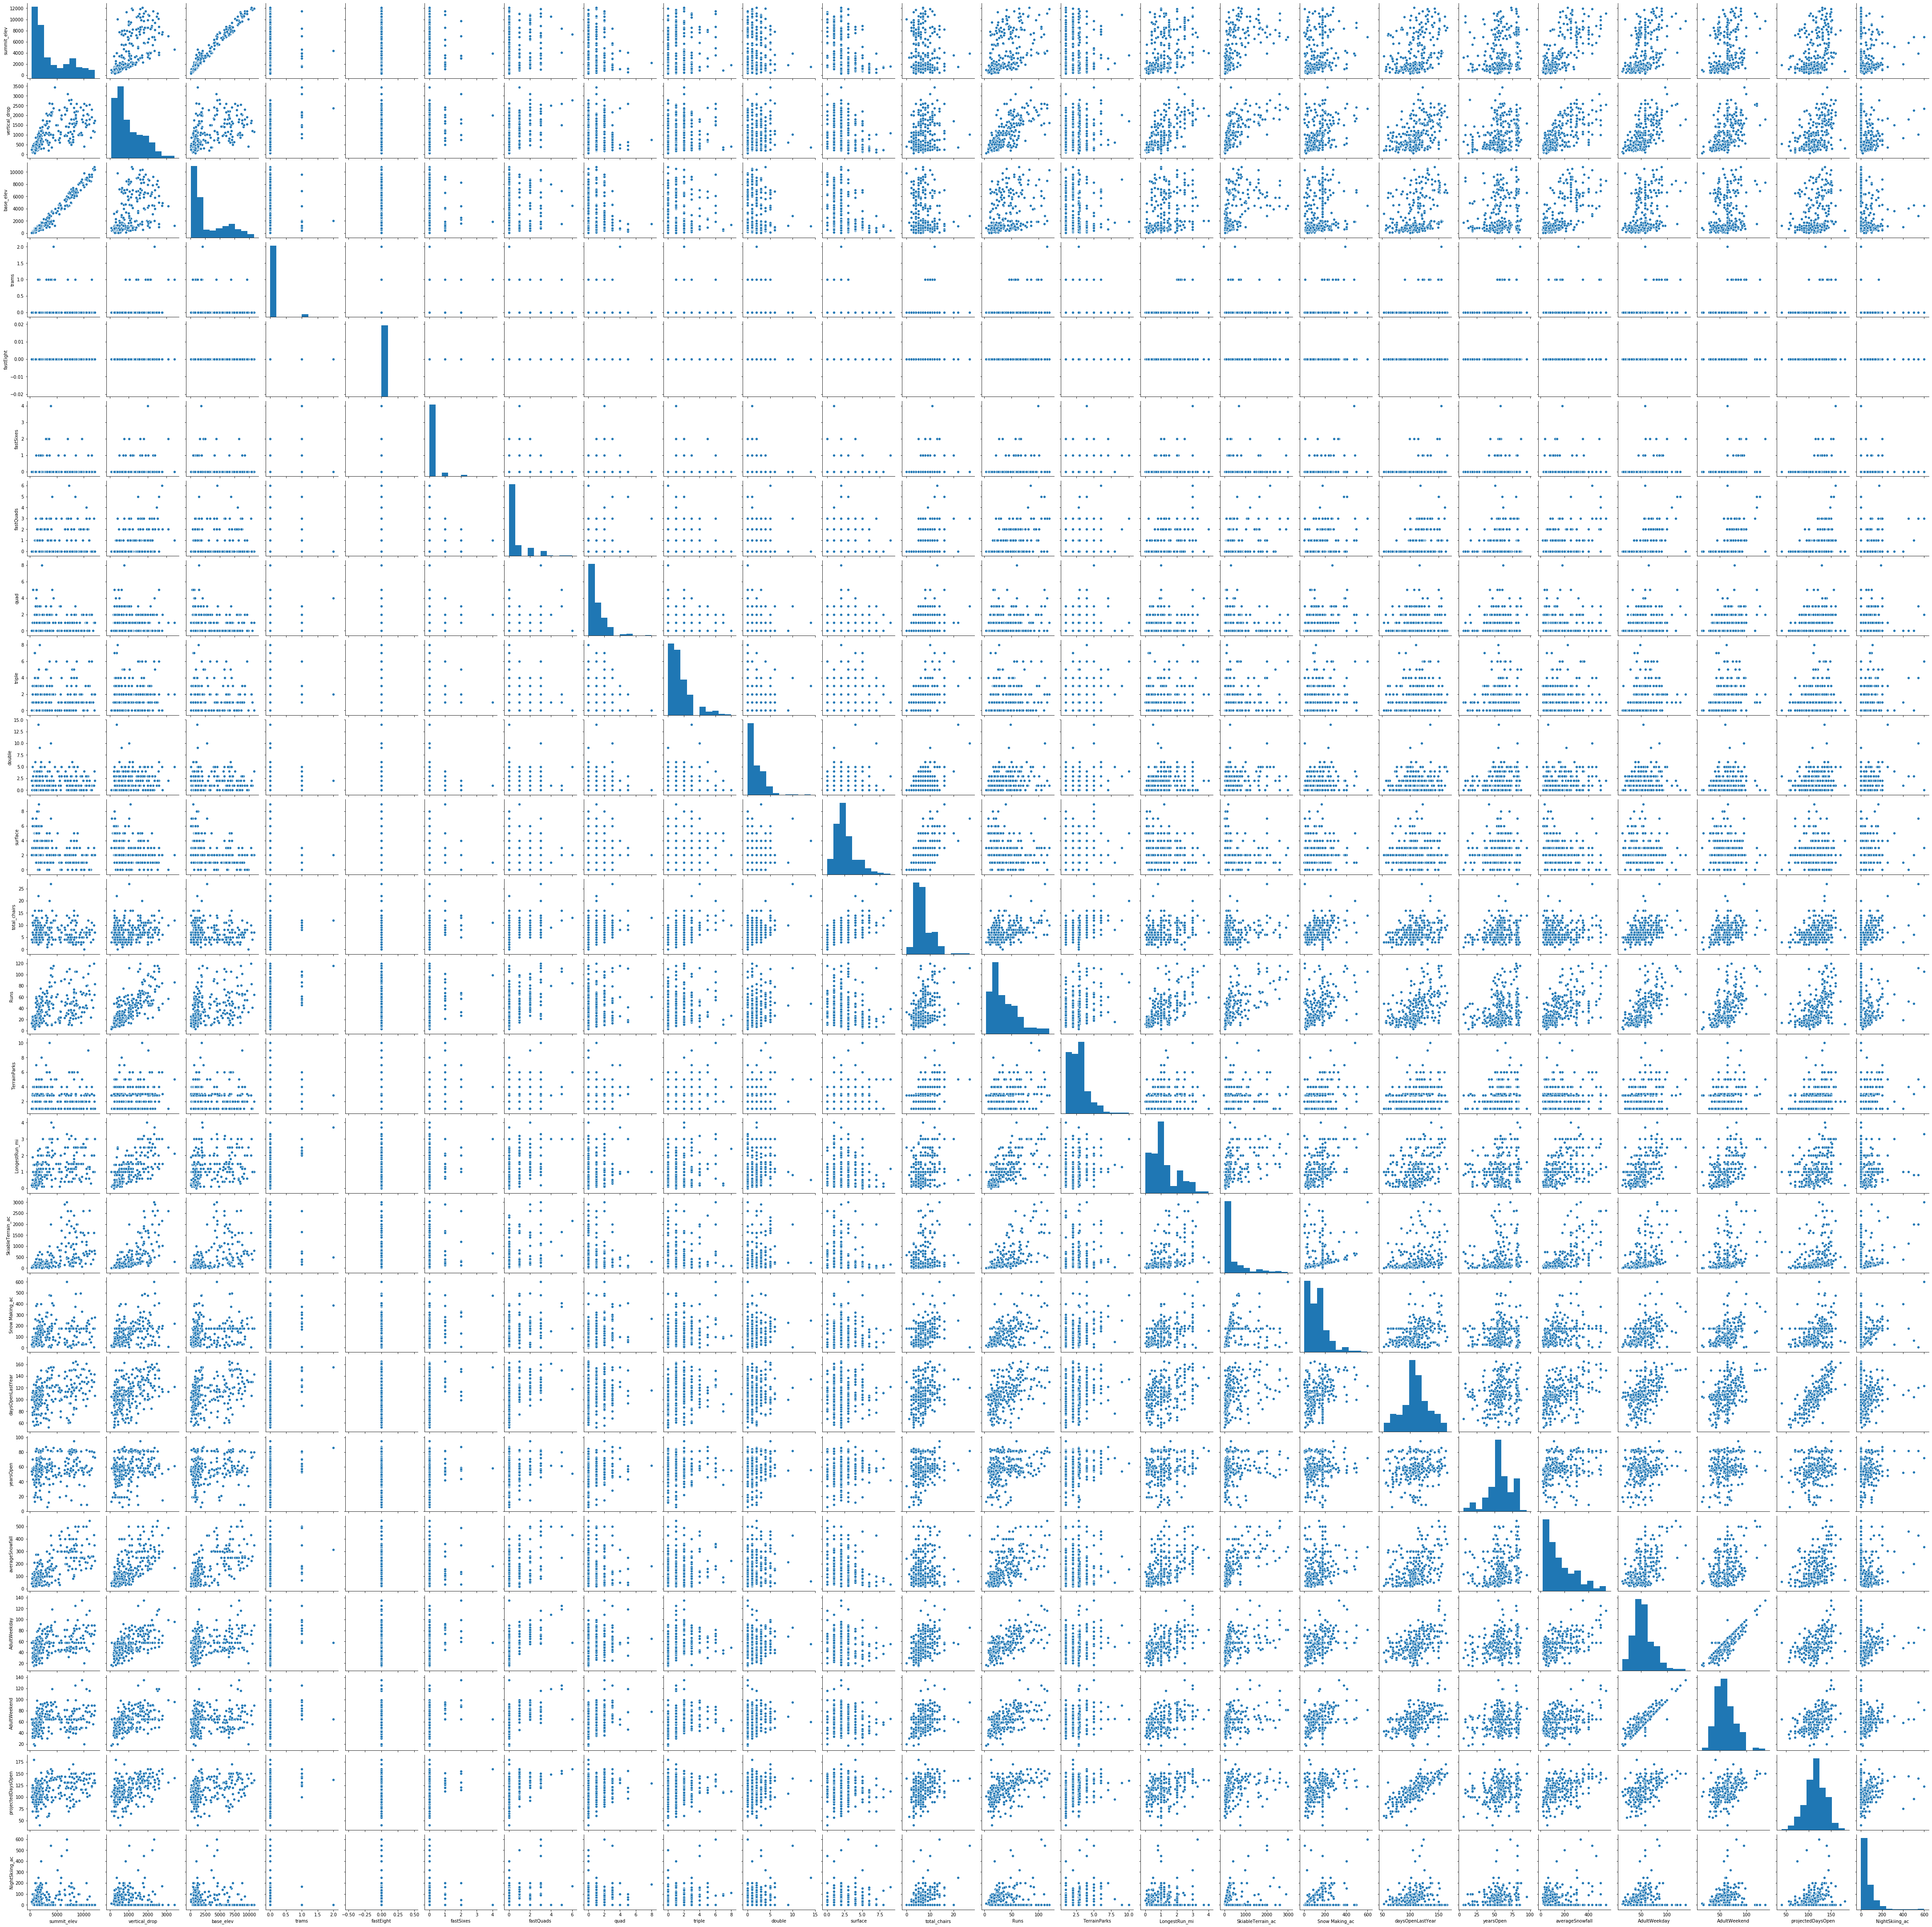

In [20]:
sns.pairplot(df2)
plt.show()

# Identification and creation of features

<font color='teal'>**Create a Pearson correlation heatmap**</font>

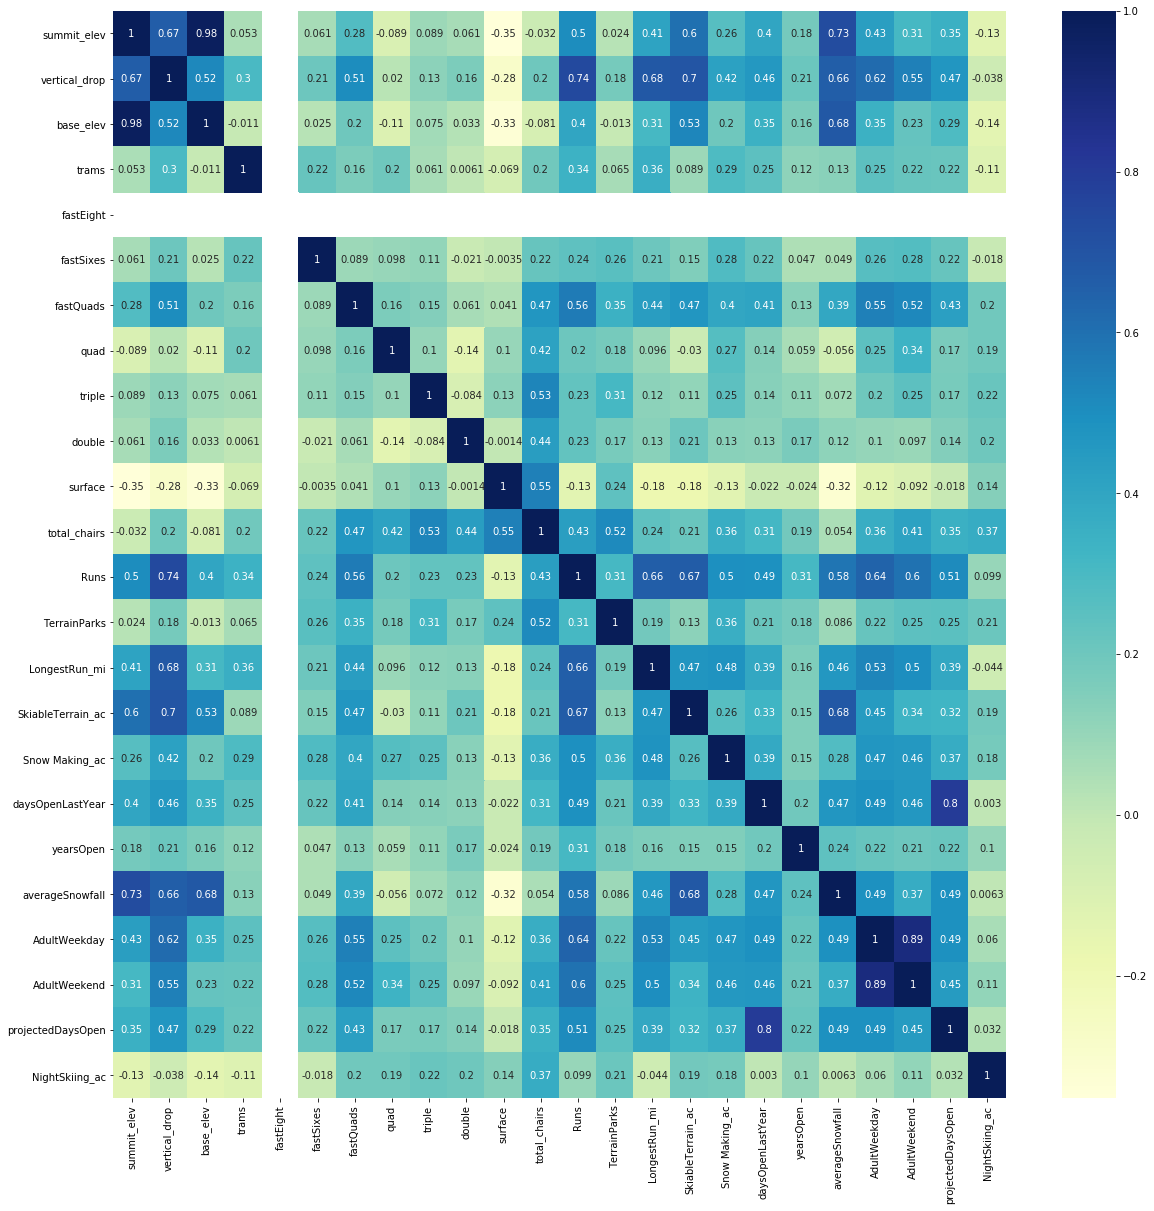

In [21]:
corr_df = df2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, cmap="YlGnBu", annot=True)
plt.show()

When reviewing the Pearson correlation coefficient heat map, you can see substantial differences in the correlations compared to the response variable(s) as well as in the features when compared to each other. The heatmap helps identify features that suffer from Multi-collinearity. 

<font color='teal'>**Use the correlation matrix displayed in the heatmap to select and remove collinear features. 
Remember to exclude the response variable(s) from the matrix to ensure they are retained in your final model development dataset. Then select those features that are more than 95% correlated for removal.**</font>

In [22]:
res_vars = set(['AdultWeekday', 'AdultWeekend', 
                'daysOpenLastYear', 'projectedDaysOpen'])
to_remove = {}
for lab_corr, row in corr_df.iterrows():
    if lab_corr in res_vars:
        continue
    for lab_row, coef in row.iteritems():
        if ((coef > 0.95) &
            (lab_corr != lab_row) &
            (lab_row not in to_remove)):
            to_remove.setdefault(lab_corr, []).append(lab_row)

print('List of features with a coefficient more than 0.95')
print('--------------------------------------------------')
i = 1
for k, vs in to_remove.items():
    for v in vs:
        print('{}: {} - {}'.format(i, k, v))
        i += 1

List of features with a coefficient more than 0.95
--------------------------------------------------
1: summit_elev - base_elev


In [23]:
df2.drop('base_elev', axis=1, inplace=True)

Now you'll address the feature creation piece of this step. You can create additional features through many methods, such as: combining several features, grouping features into bins, or even by applying an unsupervised classification algorithm, such as k-means clustering and using the clusters as features in your model development dataset.

Run the next two cells below to create an Elbow plot. The Elbow plot is a diagnostic tool that helps you determine the number of clusters to include in your k-means clustering implementation. In this example, the error between clusters and within clusters is compared for a range of 1 to 11 clusters, and it appears the elbow is between two and four, therefore we set the parameter k = 3.

In [24]:
from sklearn.cluster import KMeans
x = df2.drop(['Name','state'], axis =1).values

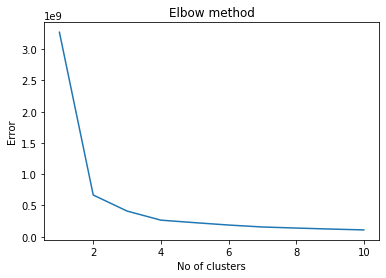

In [25]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

<font color='teal'>**Fit the k-means algorithm with the k parameter set to three and plot the results.**</font>

In [26]:
labels = KMeans(n_clusters = 3).fit_predict(x)
df2['cluster'] = labels

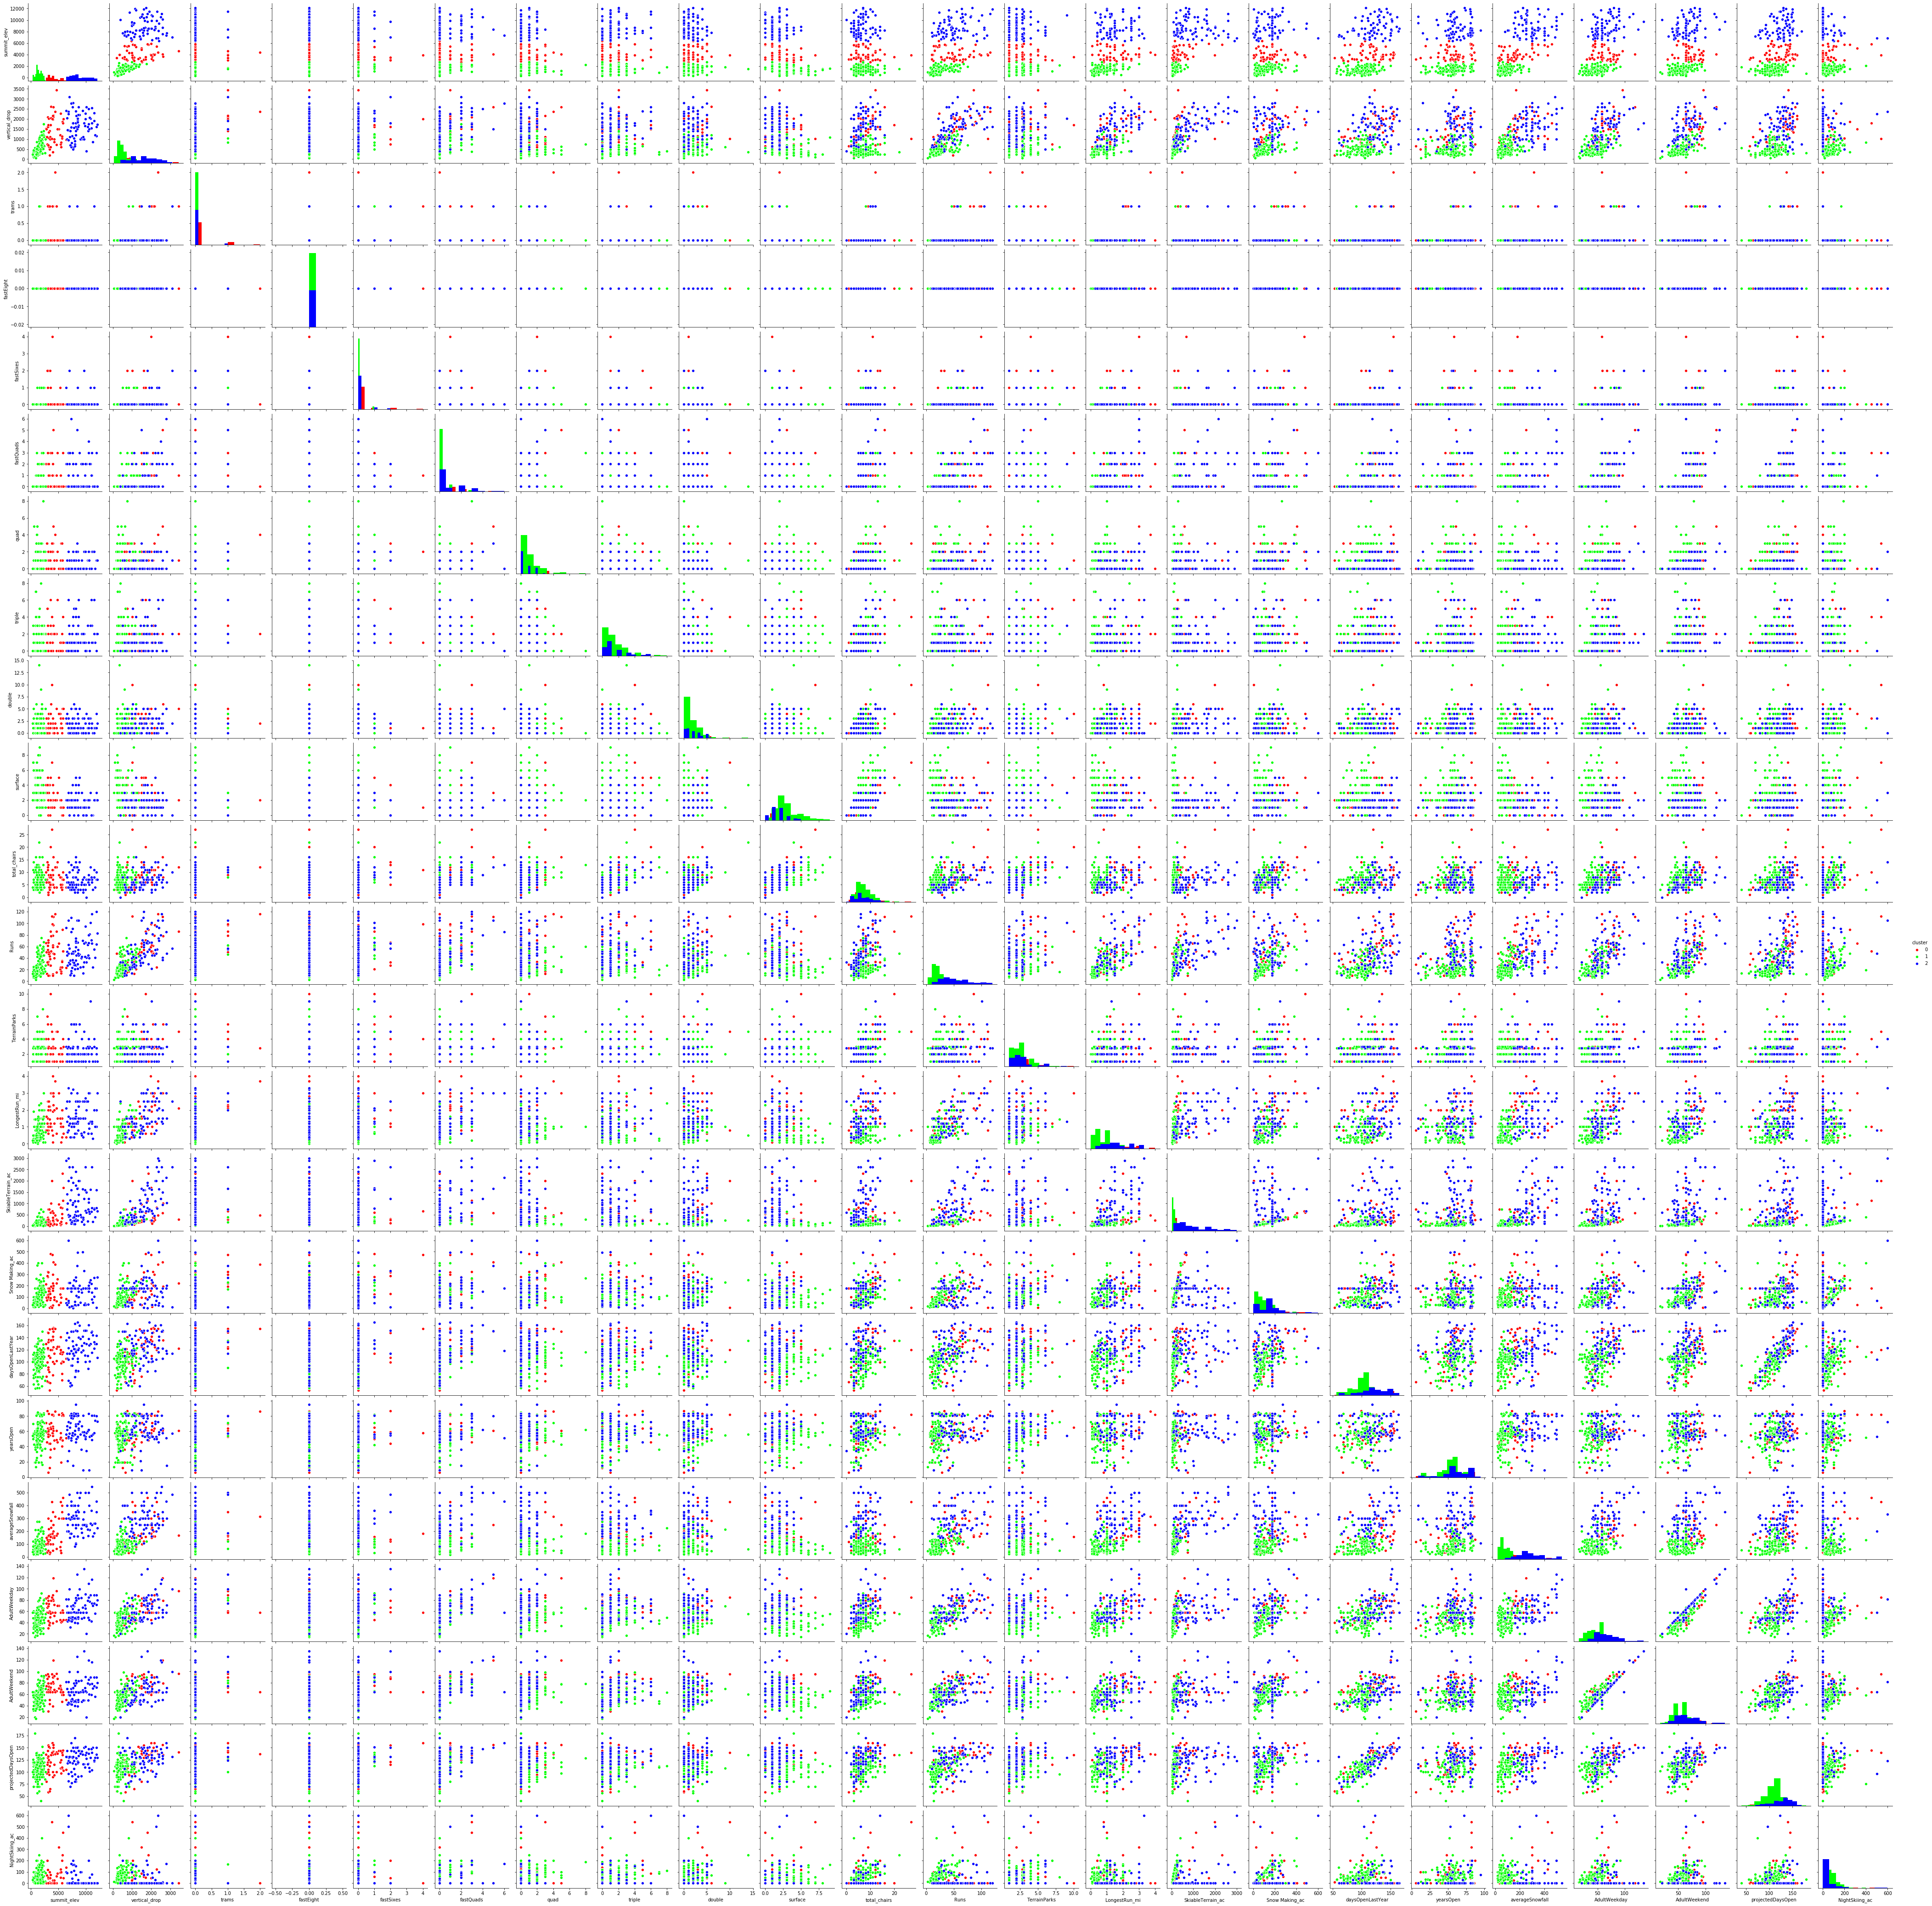

In [27]:
sns.pairplot(df2, diag_kind='hist', hue='cluster', palette={0:'#FF0000', 1:'#00FF00', 2:'#0000FF'})
plt.show()

<font color='teal'>**Add the clusters to your dataframe as a new column to include in the next step of the guided capstone and write the updated dataframe out as csv. Save the dataframe in the data folder and name it `step3_output.csv`.**</font>

In [28]:
df2.to_csv('./data/step3_output.csv', index=False)